In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('../data/raw/E_Commerce_Dataset.csv')
print("--HEAD--")
display(df.head())
df.shape

--HEAD--


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


(5630, 20)

## Removing spaced and special characters

API-compatibility and feature-engineering consistency require sanitized column names, 
so spaces, special characters and hyphens are replaced with safe underscores.

In [8]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('&', 'and')
df.columns = df.columns.str.replace('-', '_')
print(df.columns)

df = pd.get_dummies(df, columns=["PreferredLoginDevice","PreferredPaymentMode","Gender","PreferedOrderCat","MaritalStatus"], drop_first=True, dtype=int)
df.head()

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,0,1,0,0,0,0,1
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,...,0,1,1,0,0,1,0,0,0,1
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,...,0,0,1,0,0,1,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,0,0,1,0,1,0,0,0,0,1
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,...,0,0,1,0,0,1,0,0,0,1


In [9]:
df.isna().sum()
na_cols = [col for col in df.columns if df[col].isna().sum() > 0]
print(f"Columns with NA values before cleaning: {na_cols}")
df_before_cleaning = df.copy()

for col in na_cols:
    print(f"--Printing NA info of {col}--")
    print(f"{col}: {df[col].dtype}, NA count: {df[col].isna().sum()}")
    print(f"{(df[col].isna().sum() / df[col].sum()) * 100:.2f}% of values are NA in column {col}")
    print(f"Describe of {col}:\n {df[col].describe()}")

Columns with NA values before cleaning: ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
--Printing NA info of Tenure--
Tenure: float64, NA count: 264
0.48% of values are NA in column Tenure
Describe of Tenure:
 count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64
--Printing NA info of WarehouseToHome--
WarehouseToHome: float64, NA count: 251
0.30% of values are NA in column WarehouseToHome
Describe of WarehouseToHome:
 count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64
--Printing NA info of HourSpendOnApp--
HourSpendOnApp: float64, NA count: 255
1.62% of values are NA in column HourSpendOnApp
Describe of HourSpend

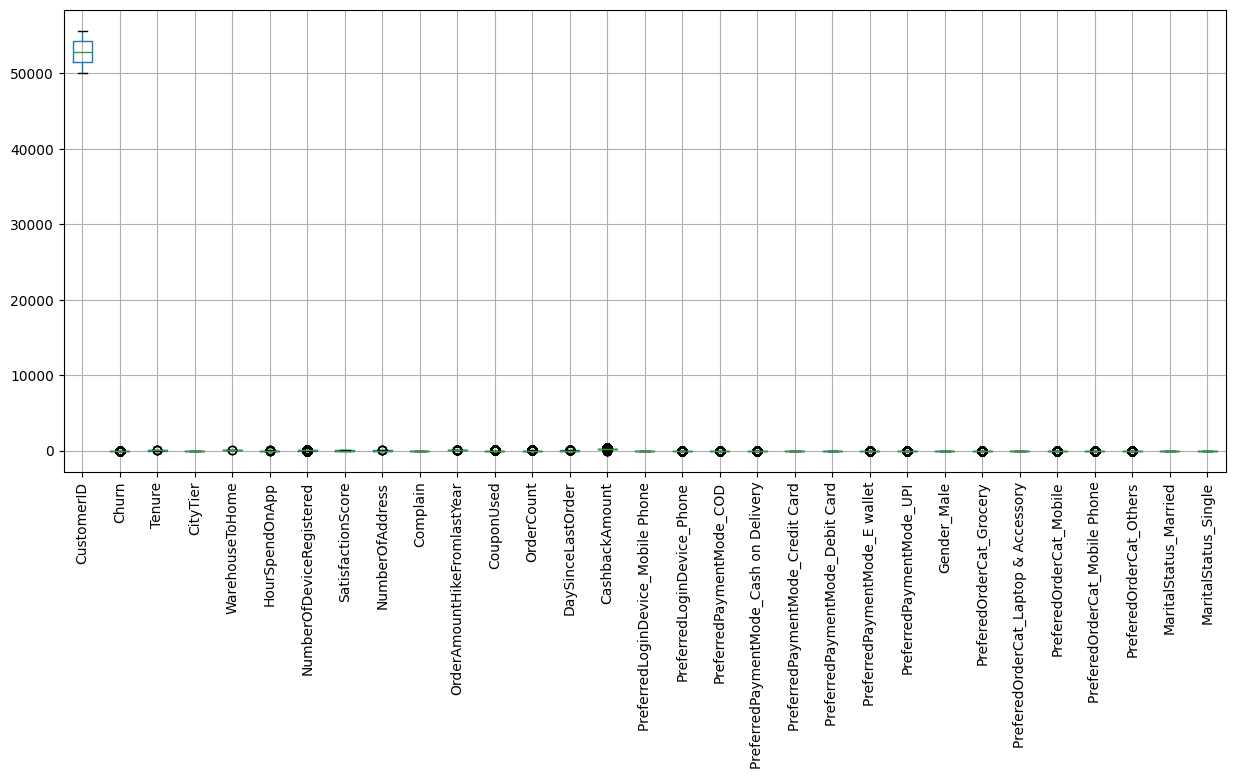

In [10]:
df.boxplot(figsize=(15,6))
plt.xticks(rotation=90)
plt.show()

## Handling missing values

The dataset contains <0.5% missing values. Instead of dropping rows (which would introduce unnecessary data loss),
I imputed the affected features using the median. Median imputation is resilient to skewed distributions and outliers,
ensuring the model does not get biased by extreme values while keeping the full sample size intact.

In [11]:
imputer = SimpleImputer(strategy='median')
df[na_cols] = imputer.fit_transform(df[na_cols])
print(f"Columns with NA values after cleaning: {[col for col in df.columns if df[col].isna().sum() > 0]}")
df.isna().sum()

for col in na_cols:
    print(f"--Printing post-imputation info of {col}--")
    print(f"Describe of {col}:\n {df[col].describe()}")

Columns with NA values after cleaning: []
--Printing post-imputation info of Tenure--
Describe of Tenure:
 count    5630.000000
mean       10.134103
std         8.357951
min         0.000000
25%         3.000000
50%         9.000000
75%        15.000000
max        61.000000
Name: Tenure, dtype: float64
--Printing post-imputation info of WarehouseToHome--
Describe of WarehouseToHome:
 count    5630.000000
mean       15.566785
std         8.345961
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64
--Printing post-imputation info of HourSpendOnApp--
Describe of HourSpendOnApp:
 count    5630.000000
mean        2.934636
std         0.705528
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64
--Printing post-imputation info of OrderAmountHikeFromlastYear--
Describe of OrderAmountHikeFromlastYear:
 count    5630.

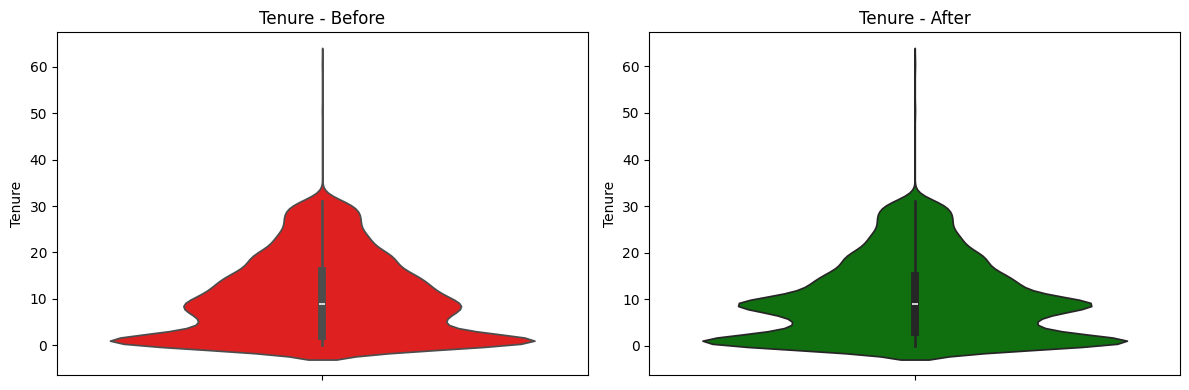

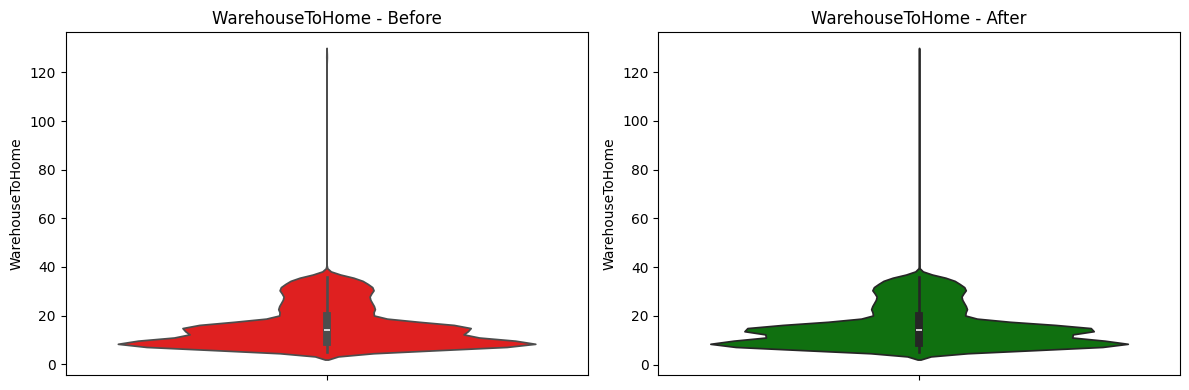

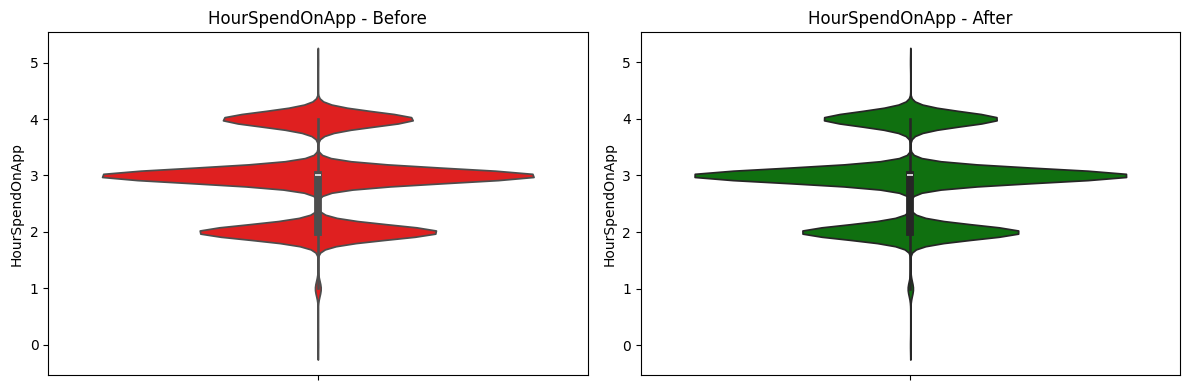

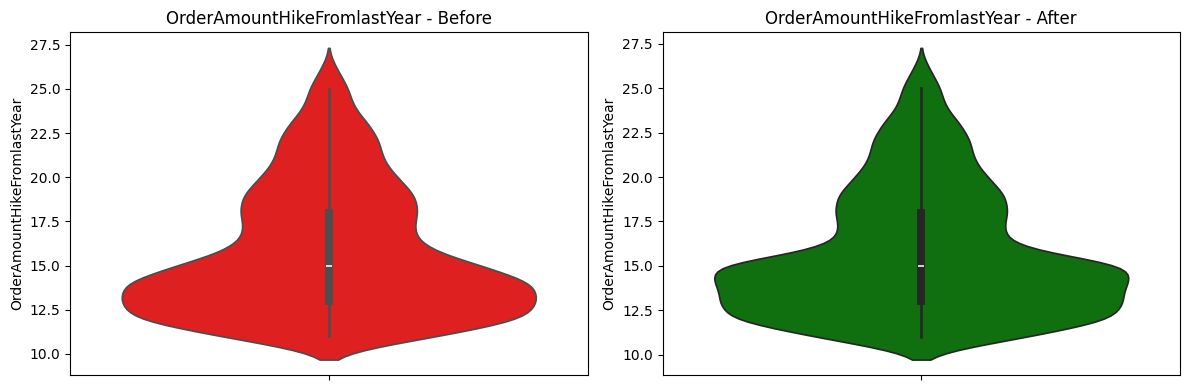

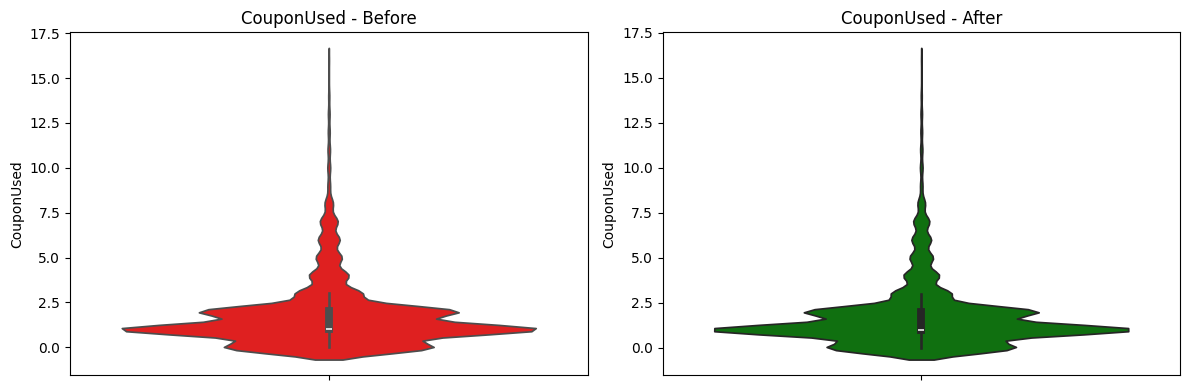

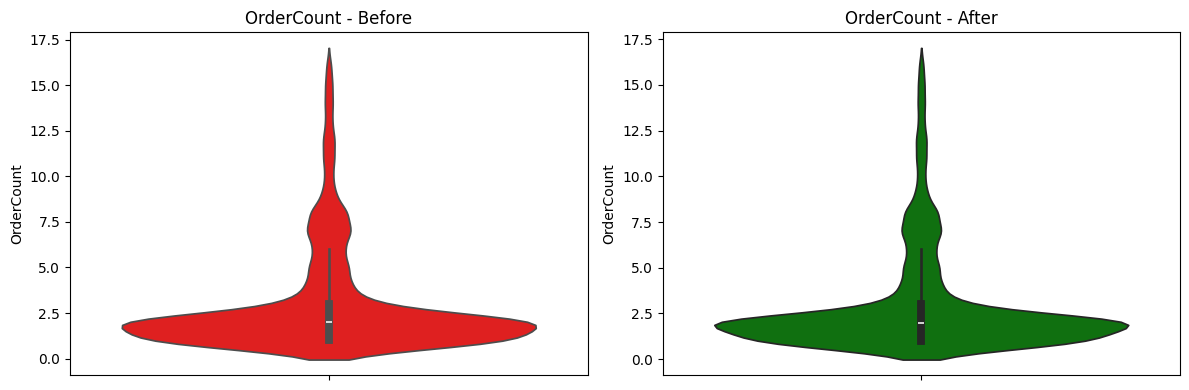

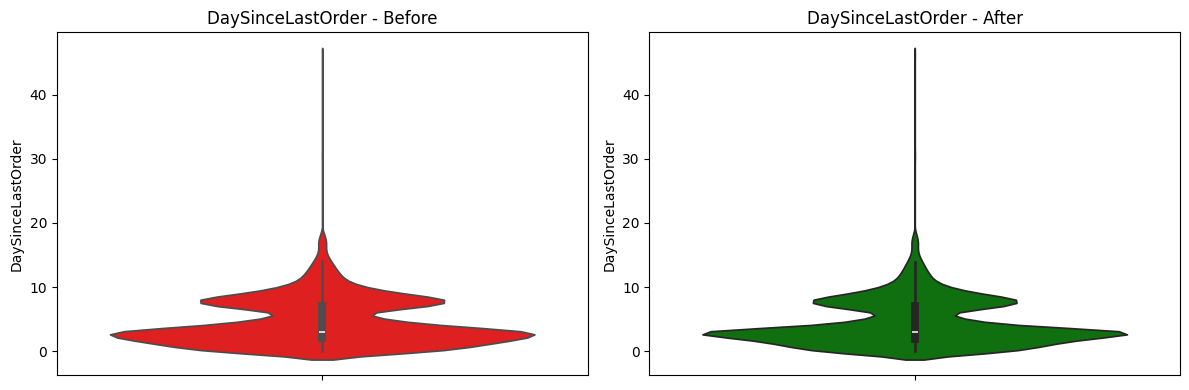

In [12]:
for col in na_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.violinplot(y=df_before_cleaning[col], ax=axes[0], color='red')
    axes[0].set_title(f'{col} - Before')
    
    sns.violinplot(y=df[col], ax=axes[1], color='green')
    axes[1].set_title(f'{col} - After')
    
    plt.tight_layout()
    plt.show()

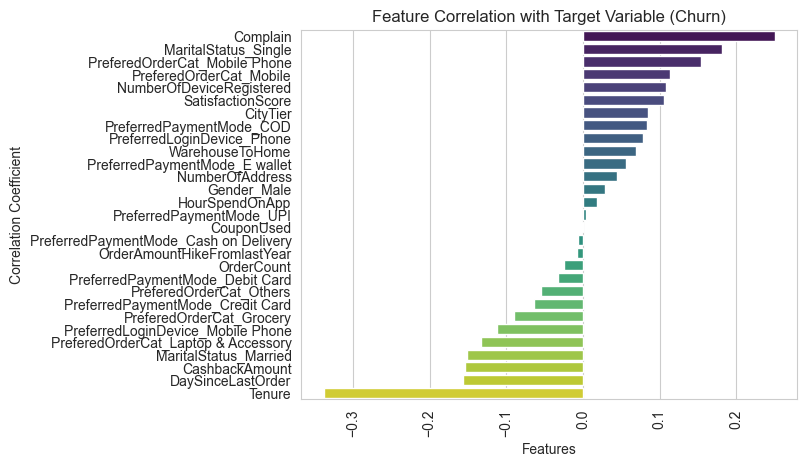

In [13]:
corr = df.corr()
target_corr = corr['Churn'][2:].sort_values(ascending=False)

sns.set_style("whitegrid")
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Feature Correlation with Target Variable (Churn)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.savefig('../visuals/feature_correlation_with_churn.png', bbox_inches='tight')
plt.show()

In [14]:
print("--Top 3 positively correlated features with Churn--")
print(target_corr.head(3))
print("--Top 3 negatively correlated features with Churn--")
print(target_corr.tail(3))

--Top 3 positively correlated features with Churn--
Complain                         0.250188
MaritalStatus_Single             0.180847
PreferedOrderCat_Mobile Phone    0.154387
Name: Churn, dtype: float64
--Top 3 negatively correlated features with Churn--
CashbackAmount      -0.154161
DaySinceLastOrder   -0.155871
Tenure              -0.337831
Name: Churn, dtype: float64


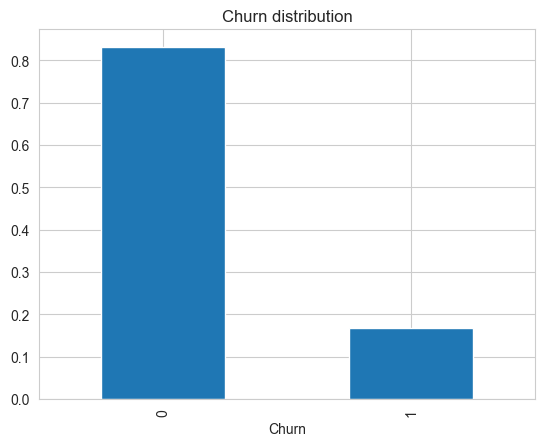

In [15]:
df['Churn'].value_counts(normalize=True).plot(kind='bar')
plt.title('Churn distribution')
plt.show()


The churn target is heavily imbalanced. Without correction the model tends to predict the majority class,
leading to deceptively high accuracy and almost zero learning about actual churn behavior.

In [16]:
df.to_csv('../data/processed/E_Commerce_Dataset_processed.csv', index=False)